# House Prices - Advanced Regression Techniques
Data fields
Here's a brief version of what you'll find in the data description file.

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.<br>
MSSubClass: The building class<br>
MSZoning: The general zoning classification<br>
LotFrontage: Linear feet of street connected to property<br>
LotArea: Lot size in square feet<br>
Street: Type of road access<br>
Alley: Type of alley access<br>
LotShape: General shape of property<br>
LandContour: Flatness of the property<br>
Utilities: Type of utilities available<br>
LotConfig: Lot configuration<br>
LandSlope: Slope of property<br>
Neighborhood: Physical locations within Ames city limits<br>
Condition1: Proximity to main road or railroad<br>
Condition2: Proximity to main road or railroad (if a second is present)<br>
BldgType: Type of dwelling<br>
HouseStyle: Style of dwelling<br>
OverallQual: Overall material and finish quality<br>
OverallCond: Overall condition rating<br>
YearBuilt: Original construction date<br>
YearRemodAdd: Remodel date<br>
RoofStyle: Type of roof<br>
RoofMatl: Roof material<br>
Exterior1st: Exterior covering on house<br>
Exterior2nd: Exterior covering on house (if more than one material)<br>
MasVnrType: Masonry veneer type<br>
MasVnrArea: Masonry veneer area in square feet<br>
ExterQual: Exterior material quality<br>
ExterCond: Present condition of the material on the exterior<br>
Foundation: Type of foundation<br>
BsmtQual: Height of the basement<br>
BsmtCond: General condition of the basement<br>
BsmtExposure: Walkout or garden level basement walls<br>
BsmtFinType1: Quality of basement finished area<br>
BsmtFinSF1: Type 1 finished square feet<br>
BsmtFinType2: Quality of second finished area (if present)<br>
BsmtFinSF2: Type 2 finished square feet<br>
BsmtUnfSF: Unfinished square feet of basement area<br>
TotalBsmtSF: Total square feet of basement area<br>
Heating: Type of heating<br>
HeatingQC: Heating quality and condition<br>
CentralAir: Central air conditioning<br>
Electrical: Electrical system<br>
1stFlrSF: First Floor square feet<br>
2ndFlrSF: Second floor square feet<br>
LowQualFinSF: Low quality finished square feet (all floors)<br>
GrLivArea: Above grade (ground) living area square feet<br>
BsmtFullBath: Basement full bathrooms<br>
BsmtHalfBath: Basement half bathrooms<br>
FullBath: Full bathrooms above grade<br>
HalfBath: Half baths above grade<br>
Bedroom: Number of bedrooms above basement level<br>
Kitchen: Number of kitchens<br>
KitchenQual: Kitchen quality<br>
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)<br>
Functional: Home functionality rating<br>
Fireplaces: Number of fireplaces<br>
FireplaceQu: Fireplace quality<br>
GarageType: Garage location<br>
GarageYrBlt: Year garage was built<br>
GarageFinish: Interior finish of the garage<br>
GarageCars: Size of garage in car capacity<br>
GarageArea: Size of garage in square feet<br>
GarageQual: Garage quality<br>
GarageCond: Garage condition<br>
PavedDrive: Paved driveway<br>
WoodDeckSF: Wood deck area in square feet<br>
OpenPorchSF: Open porch area in square feet<br>
EnclosedPorch: Enclosed porch area in square feet<br>
3SsnPorch: Three season porch area in square feet<br>
ScreenPorch: Screen porch area in square feet<br>
PoolArea: Pool area in square feet<br>
PoolQC: Pool quality<br>
Fence: Fence quality<br>
MiscFeature: Miscellaneous feature not covered in other categories<br>
MiscVal: Value of miscellaneous feature<br>
MoSold: Month Sold<br>
YrSold: Year Sold<br>
SaleType: Type of sale<br>
SaleCondition: Condition of sale<br>

**Importing Libraries**

In [7]:
import numpy as np
import pandas as pd
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV ,RepeatedKFold
from sklearn.model_selection import train_test_split,cross_val_score, KFold 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import  r2_score 
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics as sklm
import matplotlib.pyplot as plt
import seaborn as sns

**Importing Data**

In [49]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
train= data_train.copy()
test = data_test.copy()


**Exploring the data**

In [151]:
train.head(5)



,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [51]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [53]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

the "info"  function shows that there is a lot of missing data so as we calculate the percentage of the NaN value 

In [54]:
# columns int "train" set have more than 80% of nan values

nan_values_train = train.isnull().sum()
pourcentage_train = pd.DataFrame((np.array(nan_values_train)/1459)*100 ,index=nan_values_train.index)
pourcentage_train[pourcentage_train[0]>80]

,0
Alley,93.831391
PoolQC,99.588759
Fence,80.808773
MiscFeature,96.367375


In [55]:
# columns int "test" set have more than 80% of nan values

nan_values_test = test.isnull().sum()
pourcentage_test = pd.DataFrame((np.array(nan_values_test)/1459)*100 ,index=nan_values_test.index)
pourcentage_test[pourcentage_test[0]>80]

,0
Alley,92.666210
PoolQC,99.794380
Fence,80.123372
MiscFeature,96.504455


**Cleaning the data**

After exloring the data we will drop "Id" ,we found that **Alley** **PoolQC** **Fence** **MiscFeature** have more than 80% of data is NaN so the feature is not reliable we gonna exclude them

In [56]:
train = train.drop('Id', axis=1)
test = test.drop('Id', axis=1)

In [57]:
train = train.drop(['Alley','PoolQC','Fence','MiscFeature'], axis=1)

test = test.drop(['Alley','PoolQC','Fence','MiscFeature'], axis=1)


for other columns, we will change by the most **frequent** if the type of data **object** and with the **mean** if the type of data does **not object (int float...)**

In [58]:
# filling the nan for tain set
missing_value_train = train.isnull().sum()

for col in list(missing_value_train.index):
    if train[col].dtype == 'object':
        train[col].fillna(train[col].value_counts().index[0], inplace=True)
    else:
        train[col].fillna(train[col].mean(), inplace=True)
        
# filling the nan for test set        
missing_value_test = test.isnull().sum()

for col in list(missing_value_test.index):
    if test[col].dtype == 'object':
        test[col].fillna(test[col].value_counts().index[0], inplace=True)
    else:
        test[col].fillna(test[col].mean(), inplace=True)


In [312]:
x = pd.DataFrame(train.drop("SalePrice",axis=1))
y = train.iloc[:,-1]

In [313]:
x['LotShape'].dtype

dtype('O')

In [315]:
labelencoder = LabelEncoder()
for colum in columns:
    if train[colum].dtype == 'object':
        labelencoder.fit(train[colum])
        x[colum]=labelencoder.transform(x[colum])
        test[colum]=labelencoder.transform(test[colum])
        
        
    

In [316]:
print("x: \n{}".format(x.dtypes.value_counts()))


x: 
object     39
int64      33
float64     3
dtype: int64


In [276]:

df =x
df["SalePrice"]=y


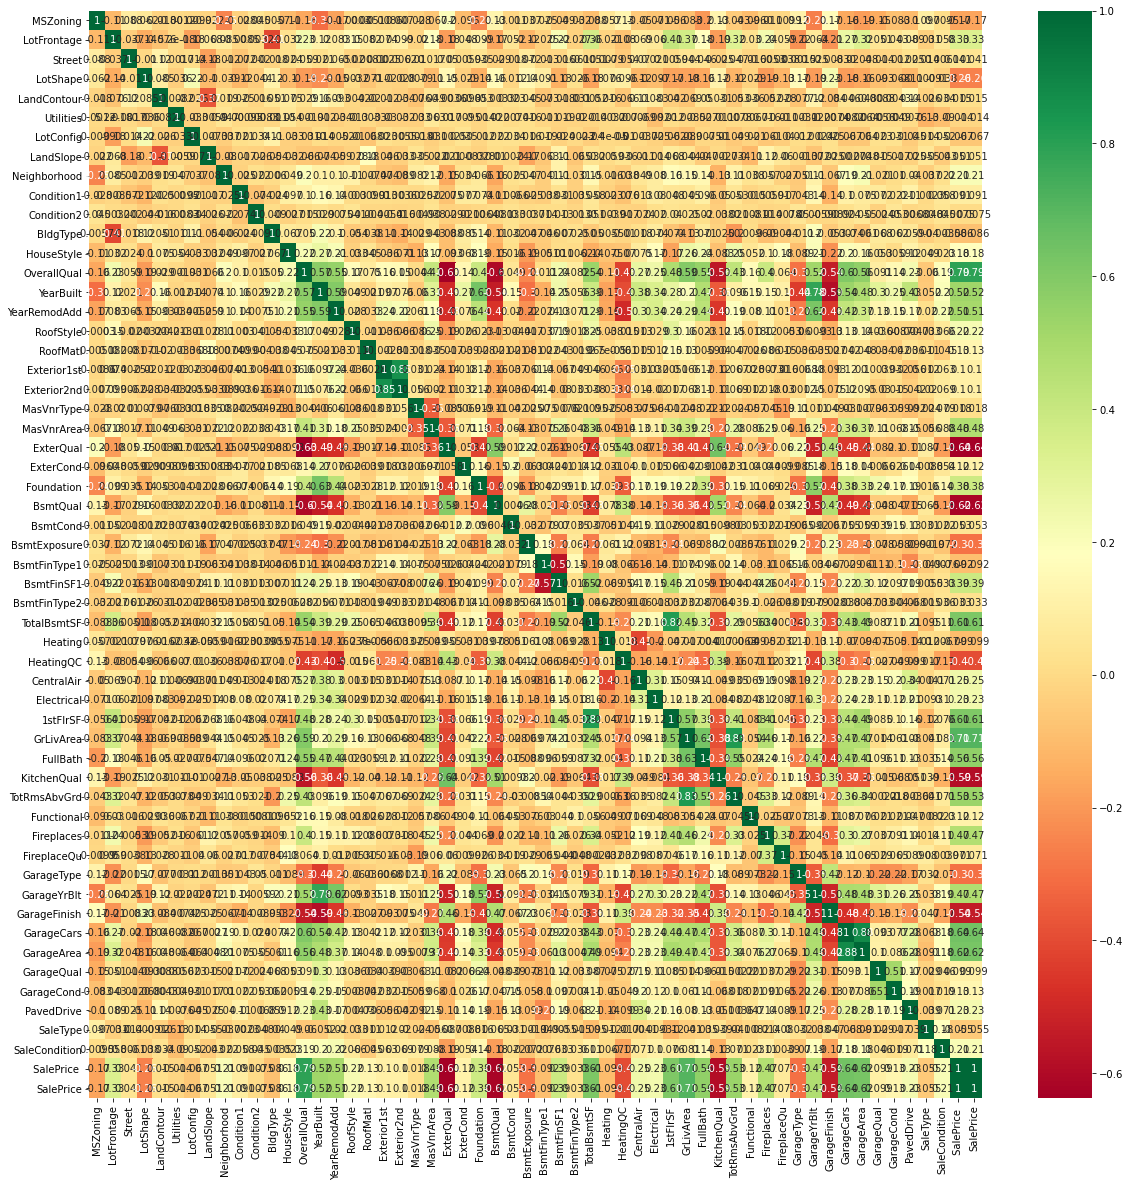

In [277]:
#get correlations of each features in dataset

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [311]:
len(corrmat.columns)

56

<AxesSubplot:>

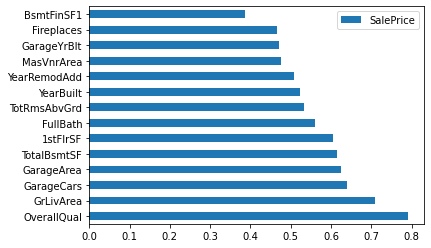

In [324]:

feature_selection=pd.DataFrame( corrmat["SalePrice"].sort_values(ascending=False))
feature_selected=feauture_selection.iloc[:17]
feature_selected.plot(kind='barh')

In [319]:
feature_selected.index

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'GarageYrBlt', 'Fireplaces', 'BsmtFinSF1'],
      dtype='object')

In [403]:
x = x[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','MasVnrArea','GarageYrBlt','Fireplaces','BsmtFinSF1']]
test = test[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','MasVnrArea','GarageYrBlt','Fireplaces','BsmtFinSF1']]



Based on Pareto law  we will select 20% of the feature 
The Pareto principle also called the Pareto law, the 80-20 principle or the 80-20 law, is an empirical phenomenon observed in certain fields: approximately 80% of the effects are the product of 20% of the causes
 in ours case we have 75 features if we take 20% thats make about 14 featue higher collorated ones 



  check for more about. [Pareto law](https://en.wikipedia.org/wiki/Pareto_principle)

In [326]:

print(y.shape)
print(x.shape)
X=x

(1460,)
(1460, 14)


In [415]:
 #Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [416]:
# Feature Scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [417]:
test = sc.transform(test)

In [421]:

#createing Root Mean Squared Logarithmic Error (RMSLE) function

def rmsle (y_test, y_pred):
    return round(np.sqrt(sklm.mean_squared_error(y_test, y_pred)),10)

In [422]:
#set the KFold function
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)


**> Finging the alpha parameter fo Ridge **

In [423]:

# define model
model = Ridge()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, y_train)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -22293.769
Config: {'alpha': 0.99}


In [424]:

## set Ridge Regulariztion (L2)
## Find Alpha

ridge = Ridge()
param = {'alpha': [a for a in range(50, 70)]}

ridge_reg = GridSearchCV(ridge, param_grid=param, scoring='neg_mean_squared_error'
                     , cv=10)

ridge_reg.fit(X_train, y_train)
print(f"The best value in Alpha: {ridge_reg.best_params_}")
print(f"The best score: {math.sqrt(-ridge_reg.best_score_)}")

The best value in Alpha: {'alpha': 52}
The best score: 34185.085224924514


In [425]:
ridge_mod = Ridge(alpha=52)
ridge_mod.fit(X_train, y_train)
ridge_mod_train = ridge_mod.predict(X_train)
ridge_mod_test = ridge_mod.predict(X_test)

print(f'Root Mean Square Error train =  {rmsle(y_train, ridge_mod_train)}')
print(f'Root Mean Square Error test =  {rmsle(y_test, ridge_mod_test)}')   

MSEs = cross_val_score(ridge_mod, X, y, 
                       scoring='neg_mean_squared_error', 
                       cv=kfolds)

for i,j in enumerate(MSEs):
    j= math.sqrt(np.mean(-j))
    print(f'Fold {i}: {round(j,4)}')
    
print(f'Mean RMSE in Ridge: {round(math.sqrt(np.mean(-MSEs)),10)}')

Root Mean Square Error train =  33241.9804827743
Root Mean Square Error test =  46131.4849570333
Fold 0: 40519.4467
Fold 1: 35215.4823
Fold 2: 28682.5759
Fold 3: 37659.6636
Fold 4: 42482.2742
Fold 5: 62393.7408
Fold 6: 37267.6269
Fold 7: 29856.9961
Fold 8: 28901.1228
Fold 9: 27300.728
Mean RMSE in Ridge: 38316.4971966729


In [426]:
from sklearn.linear_model import Lasso

lasso = Lasso()
params = {'alpha': [0.1, 1, 10]}

lasso_reg = GridSearchCV(lasso, param_grid=param, cv=kfolds, scoring='neg_mean_squared_error')

lasso_reg.fit(X_train, y_train)
print(f'The best value of lasso: {lasso_reg.best_params_}')

The best value of lasso: {'alpha': 50}


In [427]:

lasso_mod = Lasso(alpha=69)
lasso_mod.fit(X_train, y_train)
lasso_mod_train = lasso_mod.predict(X_train)
lasso_mod_test = lasso_mod.predict(X_test)

print(f'R2 Score  train =  {str(r2_score(y_train, lasso_mod_train))}')
print(f'R2 Score test = {r2_score(y_test, lasso_mod_test)}')

Lasso_CV = Lasso(alpha=1)
MSEs = cross_val_score(lasso_mod, X, y, scoring='neg_mean_squared_error', cv=kfolds)

for i,j in enumerate(MSEs):
    j= math.sqrt(np.mean(-j))
    print(f'Fold {i}: {round(j,4)}')

print(f'Mean Lasso: {round(math.sqrt(np.mean(-MSEs)),10)}')

R2 Score  train =  0.8227062816666746
R2 Score test = 0.6715822321394782
Fold 0: 40611.5105
Fold 1: 35306.0084
Fold 2: 28921.8262
Fold 3: 37831.3922
Fold 4: 42345.5817
Fold 5: 62263.771
Fold 6: 37403.5888
Fold 7: 29978.3985
Fold 8: 28924.9589
Fold 9: 27404.4531
Mean Lasso: 38365.1024480945


In [428]:
## Set RandomForest model
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=2200,
                                      max_depth=13,
                                      min_samples_split=5,
                                      min_samples_leaf=5,
                                      max_features=None,
                                      random_state=42,
                                      oob_score=True
                                     )

random_for = random_forest.fit(X_train, y_train)
random_for_mod = random_for.predict(X_test)

print(f'R2 Score test = {r2_score(y_test, random_for_mod)}')
print(f'Root Mean Square Error test = {rmsle(y_test, random_for_mod)}')

R2 Score test = 0.8322893904609658
Root Mean Square Error test = 33274.787590839


In [429]:
## Set XGBRegressor model
from xgboost import XGBRegressor
xgb_regress = XGBRegressor(learning_rate=0.01,
                         n_estimators=3600,
                         max_depth=4, min_child_weight=1,
                         gamma=0.6, scale_pos_weight=1, 
                         seed=27, reg_alpha=0.00006 )

xg_mod = xgb_regress.fit(X_train, y_train)
xg_pred = xg_mod.predict(X_test)

print(f'R2 Score test =  {r2_score (y_test, xg_pred)}') 
print(f'Root Mean Square Error test = {rmsle(y_test, xg_pred)}')

R2 Score test =  0.8929776266209103
Root Mean Square Error test = 26581.0609996912


In [430]:
from sklearn.ensemble import GradientBoostingRegressor
lr_list = [0.001 ,0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in lr_list :
    gb_r = GradientBoostingRegressor(n_estimators=1500, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_r.fit(X_train, y_train)
    stacking_pred = gb_r.predict(X_test)
    print("Learning rate: ", learning_rate)
    print(f'R2 Score test =  {r2_score(y_test, stacking_pred)}')
    print(f'Root Mean Square Error test = {rmsle(y_test, stacking_pred)}')
    

Learning rate:  0.001
R2 Score test =  0.6716729736252556
Root Mean Square Error test = 46557.3593377164
Learning rate:  0.05
R2 Score test =  0.876558509614643
Root Mean Square Error test = 28547.336970956
Learning rate:  0.075
R2 Score test =  0.8752089882939672
Root Mean Square Error test = 28702.9593526637
Learning rate:  0.1
R2 Score test =  0.880200680657984
Root Mean Square Error test = 28123.0357174514
Learning rate:  0.25
R2 Score test =  0.8771848915324753
Root Mean Square Error test = 28474.8156593178
Learning rate:  0.5
R2 Score test =  0.8566798672811671
Root Mean Square Error test = 30760.162397903
Learning rate:  0.75
R2 Score test =  0.8218105786116405
Root Mean Square Error test = 34298.5675082455
Learning rate:  1
R2 Score test =  0.781705610704471
Root Mean Square Error test = 37962.6315495051


In [431]:
gb_r = GradientBoostingRegressor(n_estimators=2200, learning_rate= 0.1, max_features=2, max_depth=2, random_state=0)
gb_r.fit(X_train, y_train)
stacking_pred = gb_r.predict(X_test)
print("Learning rate: ", learning_rate)
print(f'R2 Score test =  {r2_score(y_test, stacking_pred)}')
print(f'Root Mean Square Error test = {rmsle(y_test, stacking_pred)}')

Learning rate:  1
R2 Score test =  0.8817870053528089
Root Mean Square Error test = 27936.2193992965


In [433]:
prdicted= xg_mod.predict(test)

In [434]:

submission = pd.DataFrame({
    "Id": data_test["Id"],
    "SalePrice": prdicted
    })

In [435]:
submission

,Id,SalePrice
0,1461,19334.242188
1,1462,19334.242188
2,1463,23282.076172
3,1464,23282.076172
4,1465,19334.242188
...,...,...
1454,2915,19334.242188
1455,2916,19334.242188
1456,2917,23282.076172
1457,2918,19334.242188


In [436]:
submission.to_csv("submission_test_set.csv", index=False)
submission.head()

,Id,SalePrice
0,1461,19334.242188
1,1462,19334.242188
2,1463,23282.076172
3,1464,23282.076172
4,1465,19334.242188


In [437]:
#comapre between pridcted result and data result
sale_price_compare = pd.DataFrame({
    "train sale price desc": train.describe().iloc[:, -1],
    "test sale price desc": submission.describe().iloc[:, -1]
    },index=['count','mean','std','min','25%','50%','75%','max' ])
sale_price_compare

,train sale price desc,test sale price desc
count,1460.000000,1459.000000
mean,180921.195890,25211.359375
std,79442.502883,9097.352539
min,34900.000000,19334.242188
25%,129975.000000,19334.242188
50%,163000.000000,23282.076172
75%,214000.000000,23282.076172
max,755000.000000,64986.628906
